## 🔢 Alle Erwartungswerte $E(V)$ für gegebene Chipanzahl $n$

Für eine feste Anzahl an Feldern $m$ und Chips $n$ erzeugen wir alle möglichen Verteilungen $V = (v_1, \dots, v_m)$ mit $\sum v_j = n$.

Für jede Verteilung berechnen wir den Erwartungswert $E(V)$ exakt (als Bruch) und näherungsweise (als Dezimalzahl), speichern sie sortiert in einer CSV-Datei, und stellen sie grafisch dar.

Zusätzlich zeigen wir die 5 kleinsten und 5 größten Erwartungswerte in tabellarischer Form.

Die verwendete Formel basiert auf der rekursiven Definition:

$$
E(V) =
\begin{cases}
0, & \text{falls } V = (0, \dots, 0) \\
\displaystyle{\frac{1}{s} + \frac{1}{s}\sum_{j=1}^m q_j \cdot E(V - e_j)}, & \text{sonst}
\end{cases}
$$

Dabei gilt:
- $ \mathbf{1}_{\{v_j > 0\}} $ ist die Indikatorfunktion, die prüft, ob auf Feld $j$ noch ein Chip liegt.
- $ q_j := p_j \cdot \mathbf{1}_{\{v_j > 0\}}$ liefert die Wahrscheinlichkeit $p_j$, falls auf dem $j$-ten Feld mindestens ein Chip liegt,
- $s := \sum_{j=1}^m q_j$ ist die Gesamtwahrscheinlichkeit, dass ein Wurf überhaupt etwas bewirkt.
- $ V - e_j $ bezeichnet die Spielsituation nach einem Treffer auf Feld $j$.


Dies zeigt anschaulich, wie stark die Setzstrategie den Erwartungswert beeinflusst.

---

Anzahl der Fächer (z. B. 3):  3


Gib 3 Wahrscheinlichkeiten als Brüche (z. B. 1/2):


p1 =  1/2
p2 =  1/3
p3 =  1/6
Anzahl der Chips (z. B. 6):  6
X-Tick-Abstand (z. B. 5):  1



CSV gespeichert als: erwartungswerte_m3_n6.csv

🔻 Kleinste Erwartungswerte:


,Nr.,Verteilung,E(V),E(V) (float)
0,1,"(4, 2, 0)",29374/3125,9.399680
1,2,"(3, 2, 1)",596291/60000,9.938183
2,3,"(3, 3, 0)",31629/3125,10.121280
3,4,"(4, 1, 1)",812979/80000,10.162237
4,5,"(5, 1, 0)",31979/3125,10.233280



🔺 Größte Erwartungswerte:


,Nr.,Verteilung,E(V),E(V) (float)
23,24,"(1, 1, 4)",138493/5760,24.043924
24,25,"(0, 2, 4)",1958/81,24.172840
25,26,"(1, 0, 5)",15361/512,30.001953
26,27,"(0, 1, 5)",2431/81,30.012346
27,28,"(0, 0, 6)",36,36.000000


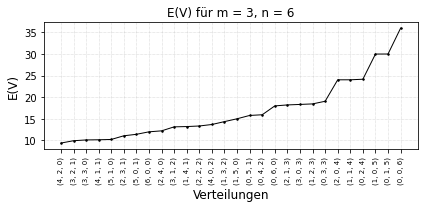

PDF gespeichert als erwartungswerte_m3_n6.pdf


In [4]:
from fractions import Fraction
from functools import lru_cache
import itertools
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Eingaben
m = int(input("Anzahl der Fächer (z. B. 3): "))
print(f"Gib {m} Wahrscheinlichkeiten als Brüche (z. B. 1/2):")
p = [Fraction(input(f"p{i+1} = ")) for i in range(m)]

# Normalisieren
if sum(p) != 1:
    p = [x / sum(p) for x in p]

n = int(input("Anzahl der Chips (z. B. 6): "))
tick_abstand = int(input("X-Tick-Abstand (z. B. 5): "))

# Erwartungswertfunktion
@lru_cache(maxsize=None)
def expected_throws(*V):
    if all(v == 0 for v in V):
        return Fraction(0)
    total = Fraction(0)
    s = Fraction(0)
    for j, vj in enumerate(V):
        if vj > 0:
            new_state = list(V)
            new_state[j] -= 1
            total += p[j] * expected_throws(*tuple(new_state))
            s += p[j]
    return (Fraction(1) + total) / s

# Verteilungen erzeugen
verteilungen = [v for v in itertools.product(range(n+1), repeat=m) if sum(v) == n]
werte = sorted([(v, expected_throws(*v)) for v in verteilungen], key=lambda x: x[1])

# DataFrame
df = pd.DataFrame([
    {"Nr.": i+1, "Verteilung": str(v), "E(V)": str(ev), "E(V) (float)": float(ev)}
    for i, (v, ev) in enumerate(werte)
])

# CSV speichern
csv_path = f"erwartungswerte_m{m}_n{n}.csv"
df.to_csv(csv_path, index=False)
print(f"\nCSV gespeichert als: {csv_path}")

# Top 5 & Bottom 5 anzeigen
print("\n🔻 Kleinste Erwartungswerte:")
display(df.head(5))
print("\n🔺 Größte Erwartungswerte:")
display(df.tail(5))

# Plot
x_vals = list(range(len(werte)))
labels = [str(v) for v, _ in werte]
evs = [float(ev) for _, ev in werte]

fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)

anzahl_punkte = len(evs)
if anzahl_punkte < 500:
    lw = 1.0
    ms = 3
elif anzahl_punkte < 2000:
    lw = 0.5
    ms = 2
else:
    lw = 0
    ms = 1

ax.plot(x_vals, evs, color="black", marker=".", markersize=ms, linewidth=lw)
ax.set_ylabel("E(V)", fontsize=12)
ax.set_xlabel("Verteilungen", fontsize=12)
ax.set_title(f"E(V) für m = {m}, n = {n}", fontsize=12)
ax.grid(True, linestyle=":", linewidth=0.5)

if len(labels) <= 28:
    ax.set_xticks(x_vals)
    ax.set_xticklabels(labels, rotation=90, fontsize=7)
else:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_abstand))

plt.tight_layout()
plt.show()
pdf_path = f"erwartungswerte_m{m}_n{n}.pdf"
plt.savefig(pdf_path, format="pdf", dpi=600, bbox_inches="tight")
plt.close()

print(f"PDF gespeichert als {pdf_path}")
